In [12]:
from tensorflow import keras

In [13]:
from preprocessing_utils import PreprocessingUtils

In [14]:
from model_wrapper import ModelWrapper

In [15]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [5]:
def build_alex_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                96, (11, 11), strides=(4, 4), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(256, (5, 5), activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(256, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [6]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [7]:
alex_net_wrapper.build_model(build_fn=build_alex_net, model_name=alex_net_wrapper.model_name)

Building model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                         

In [8]:
alex_net_wrapper.train_evaluate_and_save_model()

Epoch 1/100
9/9 [==============================] - 11s 328ms/step - loss: 48.8953 - accuracy: 0.0474 - val_loss: 32.4912 - val_accuracy: 0.0507
Epoch 2/100
9/9 [==============================] - 2s 179ms/step - loss: 24.9585 - accuracy: 0.0861 - val_loss: 16.3680 - val_accuracy: 0.0599
Epoch 3/100
9/9 [==============================] - 1s 148ms/step - loss: 12.9955 - accuracy: 0.0902 - val_loss: 9.5135 - val_accuracy: 0.0645
Epoch 4/100
9/9 [==============================] - 1s 153ms/step - loss: 8.1497 - accuracy: 0.0961 - val_loss: 6.7874 - val_accuracy: 0.0599
Epoch 5/100
9/9 [==============================] - 1s 148ms/step - loss: 6.0775 - accuracy: 0.1075 - val_loss: 5.3929 - val_accuracy: 0.0645
Epoch 6/100
9/9 [==============================] - 1s 146ms/step - loss: 4.9516 - accuracy: 0.1051 - val_loss: 4.5632 - val_accuracy: 0.0691
Epoch 7/100
9/9 [==============================] - 1s 147ms/step - loss: 4.2588 - accuracy: 0.1143 - val_loss: 4.1256 - val_accuracy: 0.0553
Epoch 8

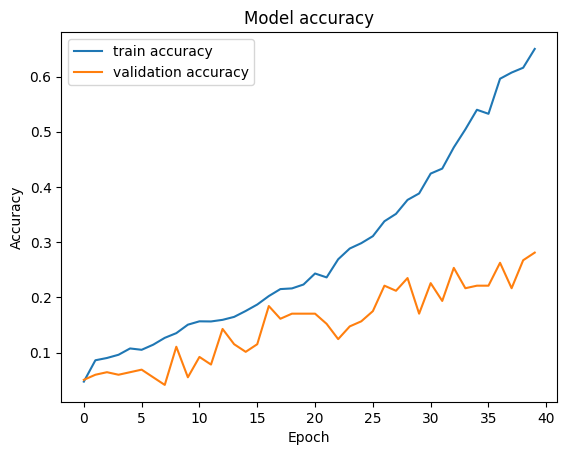

In [9]:
alex_net_wrapper.plot_accuracy()

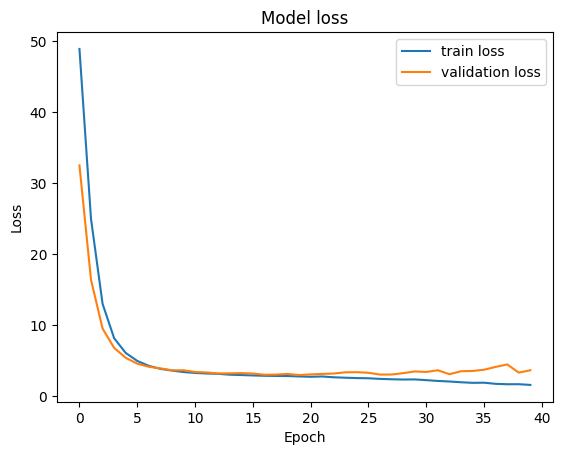

In [10]:
alex_net_wrapper.plot_loss()

20/20 [==============================] - 0s 5ms/step


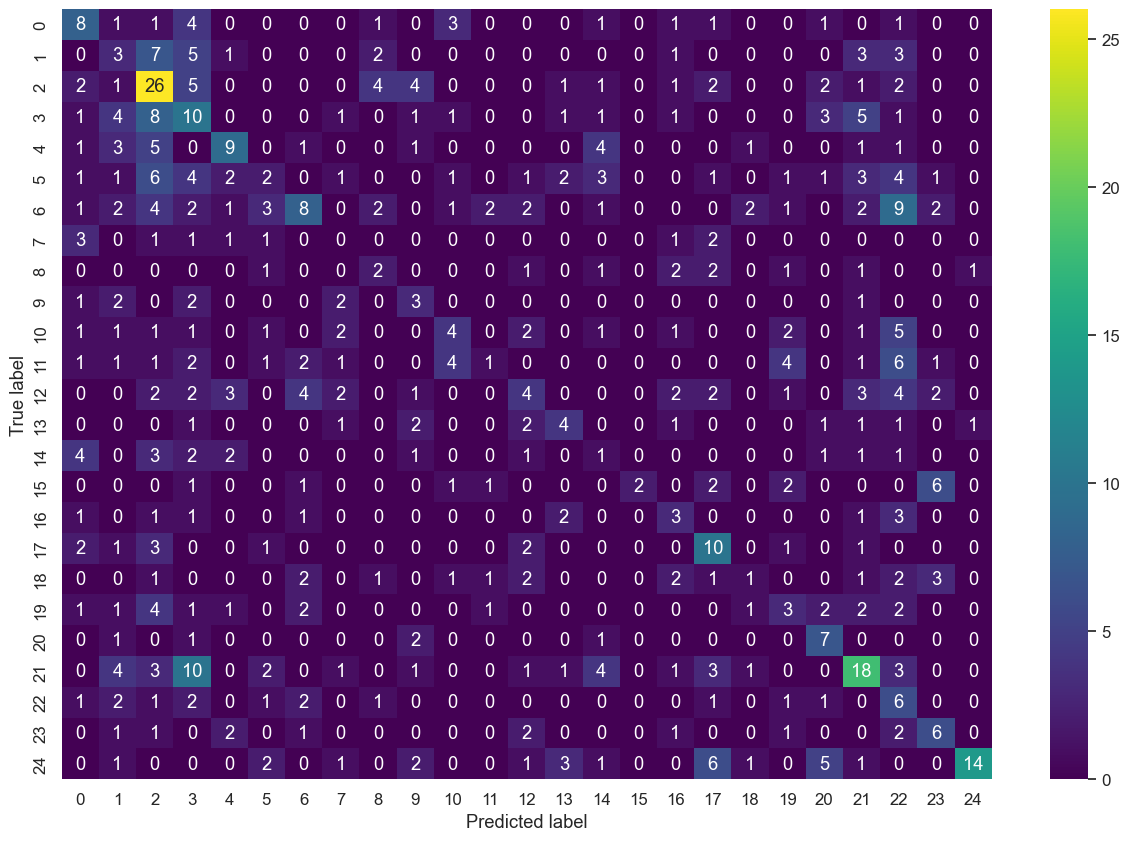

In [11]:
alex_net_wrapper.display_confusion_matrix()